In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cantor import Cantor, BoxCounting1D
from koch import Rotation2D

pi = np.arccos(-1.)

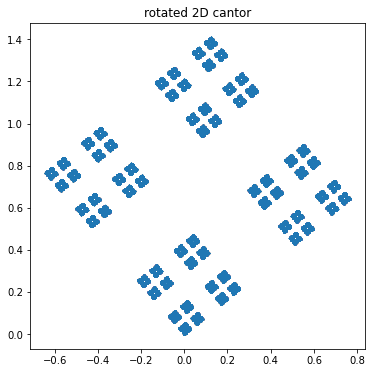

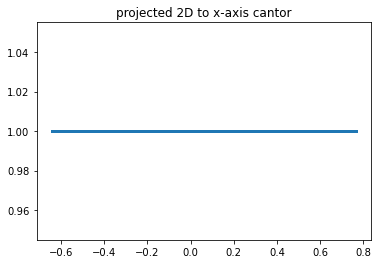

In [2]:
#create cantor set
cantor_set = Cantor(Nit = 10, Npoints = 20000)

#create cantor dust
x,y = np.meshgrid(cantor_set,cantor_set)
x = np.ndarray.flatten(x)
y = np.ndarray.flatten(y)
cantor_2d = np.vstack((x,y)).T



#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.set_title("projected 2D to x-axis cantor")
#ax.scatter(projected_cantor,np.ones(len(projected_cantor)),s=.5)
#fig.savefig("projected_cantor",dpi=200)

0.0
0.7853981633974483
1.5707963267948966
2.356194490192345


/home/santiago/MEGAsync/doctorado/cursos/fundamentos_de_procesos_estocasticos_y_estructuras_jerárquicamente_organizadas/codigos/cantor.py:83: RuntimeWarning: divide by zero encountered in log
  return -np.log(N)/np.log(2**-k)


3.141592653589793
3.9269908169872414
4.71238898038469
5.497787143782138
6.283185307179586


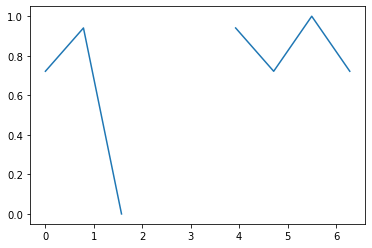

In [14]:
dimensions = []
angles = pi*np.array([0.,0.25,0.5,0.75,1.,1.25,1.5,1.75,2.])
for angle in angles:

    #rotate 
    rotated_cantor_2d = Rotation2D(cantor_2d,angle)
    #fig = plt.figure(figsize = (6,6))
    #ax = fig.add_subplot(111)
    #ax.set_title("rotated 2D cantor")
    #ax.scatter(rotated_cantor_2d[:,0],rotated_cantor_2d[:,1],s=.25)
    #fig.savefig("rotated_cantor",dpi=200)

    #project to the x-axis
    projected_cantor = rotated_cantor_2d[:,0]

    print(angle)
    #find box counting dimension
    dims = []; r = []
    for k in range(1,8):
        dimB = BoxCounting1D(projected_cantor,k=k)
        dims.append(dimB) 
        r.append(3**-k)


    #linear fit logC vs -logr
    x = -np.log(r)
    y = -np.array(dims) * np.log(r)    
    a,b = np.polyfit(x,y,deg=1)
    dimensions.append(a)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(angles,dimensions)